# Employee Data Visualization

In [37]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from config import postgres_url

#import sql engine
from sqlalchemy import create_engine
engine = create_engine(postgres_url)
connection = engine.connect()

In [17]:
#create employee dataframe from sql query
employee_query = "SELECT * FROM employees"
employees_df = pd.read_sql_query(employee_query,con=engine)
employees_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [18]:
#create salary dataframe from sql query
salary_query = "SELECT * FROM salaries"
salary_df = pd.read_sql_query(salary_query,con=engine)
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [19]:
#merging the two dataframes
emp_salary_df = employees_df.merge(salary_df, on='emp_no')
emp_salary_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


Create a histogram to visualize the most common salary ranges for employees.

In [26]:
#view salary max and min to determine ranges
print(f'min: {min(emp_salary_df.salary)}')
print(f'max: {max(emp_salary_df.salary)}')

min: 40000
max: 129492


In [86]:
#create bins for the salaries
bins = [40000, 55000, 70000, 85000, 100000, 115000, 130000]
salary_ranges = ['$40,000 - 54,999', '$55,000 - 69,999', '$70,000 - 84,999', '$85,000 - 99,999', '$100,000 - 114,999', '$115,000+']

#cut the data into the bins
emp_salary_df['salary range'] = pd.cut(emp_salary_df['salary'], bins, labels=salary_ranges, include_lowest=True)

emp_salary_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,salary range
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,"$40,000 - 54,999"
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422,"$40,000 - 54,999"
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973,"$40,000 - 54,999"
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,"$40,000 - 54,999"
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000,"$40,000 - 54,999"


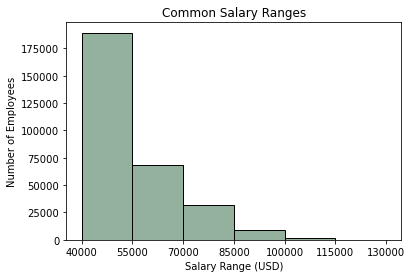

In [99]:
#plot histogram
salaries = emp_salary_df['salary']

plt.hist(salaries, bins, color='#93B19C', edgecolor='#000000')
plt.xticks(ticks=bins)
plt.xlabel('Salary Range (USD)')
plt.ylabel('Number of Employees')
plt.title('Common Salary Ranges')

plt.show()